In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as spqd
import math as math
import string

Problem 1 : 15pts - Given the function

$$
y(x) = \sin^{3}(x),
$$
1a) 6pts - Use

$$
\sin^{2}(x) = \frac{1 - \cos(2x)}{2},
$$
since $\sin^{3}(x) = \sin(x)\sin^{2}(x)$, and

$$
\sin(x)\cos(2x) = \frac{1}{2}\left(\sin(3x) - \sin(x)\right)
$$
to find a Taylor series around $x_{0}=0$ of $\sin^{3}(x)$.

Answer 1a)


$$\begin{align}
\sin^{3}(x) =  \sin(x)\sin^{2}(x)\\
=\frac{1}{2}\sin(x)(1 - \cos(2x)\\
=\frac{1}{2}\sin(x) - \sin(x)\cos(2x)\\
= \frac{1}{2}\sin(x) - \frac{1}{2}(\sin(3x) - \sin(x))\\
= \frac{\sin(x)}{2} - \frac{\sin(3x)}{4} + \frac{\sin(x)}{4} \\
= \frac{3}{4}\sin(x) -\frac{1}{4}\sin(3x)\\
= \frac{3}{4}\sum_{j = 0}^{\infty}\frac{((-1)^{j}x^{2j+1})}{2j+1!}
- \frac{1}{4}\sum_{j = 0}^{\infty}\frac{((-1)^{j}(3x)^{2j+1})}{2j+1!}\\
= \frac{1}{4}\sum_{j = 0}^{\infty}\frac{((-1)^{j}x^{2j+1})}{2j+1!}(3 - 3^{2j+1})\\
\end{align}$$


1b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.

Answer 1b)

In [2]:
def taylorSin(x,tol):
    tot = 1.
    aj = 1.
    x2 = -x**2
    j =1
    while np.max(np.abs(aj)) >= tol:
        aj *= x2/((2*j+1)*(2*j))
        tot += aj
        j +=1
    return tot


1c) 3pts - Plot this function on the interval [0,𝜋]. Provide log plots of the error in your approximation for tolerance values 10−2, 10−4, and 10−8. Comment on the behavior of your approximations for increasing values of 𝑥 and for decreasing tolerances. Note graphs should be well labeled, with legends, and well sized.

Answer 1c)

Text(0.5,1,'taySinFunction')

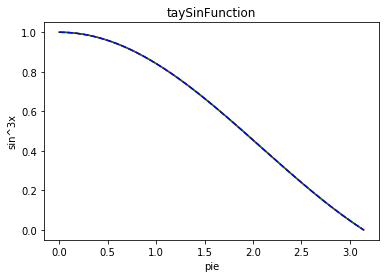

In [3]:
xvals = np.linspace(0,math.pi,int(1e3))
yvals1 = taylorSin(xvals,1e-3)
yvals2 = taylorSin(xvals,1e-5)
yvals3 = taylorSin(xvals,1e-9)
plt.plot(xvals,yvals1,color = 'r')
plt.plot(xvals,yvals2,color = 'g')
plt.plot(xvals,yvals3,color = 'b', ls = '--')
plt.ylabel('sin^3x')
plt.xlabel('pie')
plt.title('taySinFunction')

Problem 2 : 8pts - Find the first 40 terms of a sequence defined by

2a) 6pts

$$
a_{n+1} = \left\{
\begin{array}{rl}
\frac{1}{2} a_{n}       (\text{if} ~ a_{n} ~ \text{is an even number}) \\
3a_{n} + 1       (\text{if} ~ a_{n} ~ \text{is an odd number})
\end{array}
\right.
$$
and $a_1 = 11$

Answer 2a)

In [4]:
def sequence(firstTerm,numTerms):
    a = []
    a.append(firstTerm)
    for i in range (1,40):
        if a[i-1] % 2 ==0:
            a.append(a[i-1]/2)
        else:
            a.append(3*a[i-1]+1)
    return a

In [5]:
sequence(11,40)

[11,
 34,
 17,
 52,
 26,
 13,
 40,
 20,
 10,
 5,
 16,
 8,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4]

2b) 2pts

Do the same for $a_1 = 25$. Make a conjecture about this type of sequence.

Answer 2b)

In [6]:
sequence(25,40)

[25,
 76,
 38,
 19,
 58,
 29,
 88,
 44,
 22,
 11,
 34,
 17,
 52,
 26,
 13,
 40,
 20,
 10,
 5,
 16,
 8,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4,
 2,
 1,
 4]

Conjecture: The numbers will fluctuate for a while then on the ninth term it hits 11 which then repeate the sequence as above. The numbers continue to flucuate but never the less make it to a repeating patter of 4,2,1. This pattern will continue till it fills up the remaining number of terms that you predetermined.

Problem 3 : 12pts - Given the following sum

$$
y(n) =  \sum_{n=0}^{\infty} \frac{(-1)^{n}\pi^{2n+1}}{4^{2n+1}(2n+1)!}
$$
3a) 3pts - Determine a recurrence relation between the coefficients.

Answer 3a)

$$
a_{j}(n) = \frac{-\pi^{2}}{32n(2n+1)} (j\geq 1)\\
1 (j=0)\\
$$

i tried to do that bracket but took to long sorry 

3b) 5pts - In Python, develop a tolerance based, recursive, vectorized implementation of this sum and find the limit as $n\rightarrow \infty$ of the function $y(n)$. Provide a plot to support your answer (for tolerance $10^{-4}$ and $10^{-8}$).

Answer 3b)

In [7]:
def y(n,tol):
    tot = 1.
    aj = 1.
    pi2 = -(math.pi)**2
    j =1
    while np.max(np.abs(aj)) >= tol:
        aj *= pi2/ (32*n*(2*n) +1)
        tot += aj
        n +=1
    return tot

Text(0.5,1,'recurrence relation')

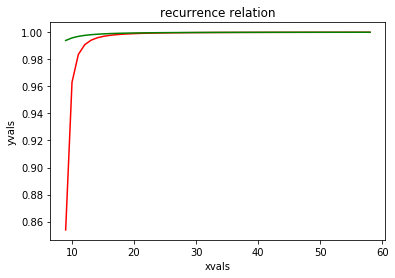

In [21]:
xvals = np.linspace(1,50,49)
yvals1 = y(xvals,1e-5)
yvals2 = y(xvals,1e-9)
##yvals1 = (y(ii,1e-5)for ii in xvals)
plt.plot(xvals,yvals1,color = 'r')
plt.plot(xvals,yvals2,color = 'g')
plt.ylabel('yvals')
plt.xlabel('xvals')
plt.title('recurrence relation')

3d) 4pts - For the recurrence relation

$$
p_{n} = 3p_{n-1} + p_{n-2}, ~ n\geq 2, 
$$
where

$$
p_{0}= 0, ~ p_{1}=1, 
$$
plot $p_{n}$ for $0\leq n \leq 15$?

Answer 3d)

Text(0.5,1,'recurrence relation')

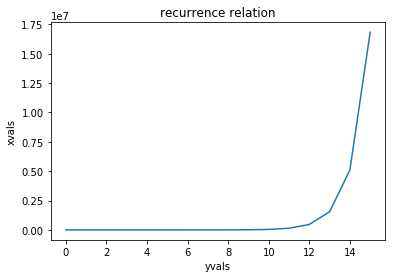

In [9]:
xvals = np.linspace(0,15,16)
yvals = [] 
for i in range(0,16):
    if i == 0:
        yvals.append(0)
    elif i == 1:
        yvals.append(1)
    else:
        yvals.append(3*(yvals[i-1])+yvals[i-2])
plt.plot(xvals,yvals)
plt.ylabel('xvals')
plt.xlabel('yvals')
plt.title('recurrence relation')

Problem 4 9pts:

4a) 4pts - Write a Python program to find the number $n$ that satisfies $$
 \sum_{i=1}^{n} i = 78
$$
Answer 4A)

In [10]:
i = 0
for n in range(1,20):
    if i == 78:
        print "The numnber n that satisfies the sequence is",
        print n -1
    i +=n

The numnber n that satisfies the sequence is 12


4b) 5pts - Using a non-vectorization, find the limit as $n\rightarrow \infty$ of the function $f(n)$ where

$$
f(n) = \sum_{j=1}^{n} \frac{3}{n} \left[ \left(1 + \frac{3j}{n}\right)^{3} - 2\left(1 + \frac{3j}{n}\right) \right]
$$
Provide a plot to support your answer.

Answer 4B)

In [11]:
def func(n):
    return sum((3./n)* (1.+(3.*i/n))**3-2.*(1.+(3.*i/n)) for i in range(1,int(n)+1))/n

Text(0.5,1,'sumSequence')

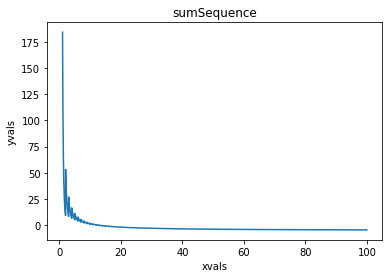

In [12]:
xvals = np.linspace(1.,100.,int(1e4))
yvals = [func(xval) for xval in xvals]
plt.plot(xvals,yvals)
plt.ylabel('yvals')
plt.xlabel('xvals')
plt.title('sumSequence')

Problem 5 6pts: We can generate a 3n+1 sequence as follows

Start with a positive integer n.

If n = 1, stop.

If n is even, replace it with n/2.

If n is odd, replace it with 3n+1.

So if we started with $n=3$, then we would generate the sequence

$$
3, 10, 5, 16, 8, 4, 2, 1
$$
it is unknown whether there are any starting values $n$ which generate a sequence which goes on for forever. Thus, an interesting associated quantity we would want to know is how many terms a given value of $n$ generates via the $3n+1$ sequence. We call this number $L(n)$. For example then, using our example of $n=3$ above, we have that

$$
L(3)  = 8
$$
Write a code to figure out how to find $L(n)$ and then generate a plot of $L(n)$ for $1\leq n \leq 1000$. Discuss any trends you observe.

In [13]:
def L(n):
    A = []
    count =0
    if n < 1 or n > 1000:
        return "not between 1 and 1000"
    if n == 1: 
        A.append(1)
        count = 1.
        return count
    while n != 1:
        if n % 2 == 0:
            n /=2
        else:
            n= 3*n +1
        A.append(n)
        count +=1.
    return count


Text(0.5,1,'3n+1 sequence')

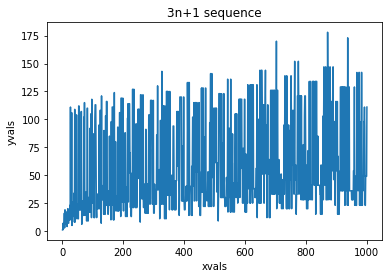

In [14]:
yvals =[]
xvals = []
n = 1000
for j in range (1,n+1):
    xvals.append(j)
    yvals.append(L(j))
plt.plot(xvals,yvals)
plt.ylabel('yvals')
plt.xlabel('xvals')
plt.title('3n+1 sequence')